<a href="https://colab.research.google.com/github/santirgerini/data_science_clusterai2021_rodriguez_gerini/blob/main/clusterai_santiago_rodriguez_gerini_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías y Drive

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression , Ridge

from sklearn.model_selection import GridSearchCV

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
root_path = "/content/gdrive/MyDrive/Ciencia de Datos - Grupo 6/"
plot_path = root_path + "Graficos/" 









# Importar Dataset

In [ ]:
df = pd.read_csv(root_path + "202109_informe_ministerio.csv",index_col=False,error_bad_lines=False, delimiter=';')

In [ ]:
filas = np.shape(df)[0] # [0] para la primera dimension
print(f'Filas: {filas}')

columnas = np.shape(df)[1] # [1] para la segunda dimension
print(f'Columnas: {columnas}\r\n')

print('Output de ".head(5)": ')
df.head(5)

Filas: 219803
Columnas: 11

Output de ".head(5)": 


,Fecha,Hora UTC,Clase de Vuelo (todos los vuelos),Clasificación Vuelo,Tipo de Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,Calidad dato
0,01/01/2021,00:02,Vuelo Privado con Matrícula Nacional,Dom,Despegue,PAR,ROS,0,PA-PA-28-181,0,DEFINITIVO
1,01/01/2021,00:24,Regular,Dom,Aterrizaje,EZE,GRA,AEROLINEAS ARGENTINAS SA,BO-B737-8MB,70,DEFINITIVO
2,01/01/2021,00:26,Regular,Dom,Aterrizaje,EZE,ECA,AEROLINEAS ARGENTINAS SA,BO-737-800,70,DEFINITIVO
3,01/01/2021,00:29,Regular,Dom,Aterrizaje,EZE,SAL,AEROLINEAS ARGENTINAS SA,BO-B-737-76N,12,DEFINITIVO
4,01/01/2021,00:37,Regular,Dom,Aterrizaje,EZE,TUC,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,26,DEFINITIVO


In [ ]:
nombre_columnas1 = df.columns.values
nombre_columnas1

array(['Fecha', 'Hora UTC', 'Clase de Vuelo (todos los vuelos)',
       'Clasificación Vuelo', 'Tipo de Movimiento', 'Aeropuerto',
       'Origen / Destino', 'Aerolinea Nombre', 'Aeronave', 'Pasajeros',
       'Calidad dato'], dtype=object)

# Limpieza DF

In [ ]:
np.shape(df)

(219803, 11)

In [ ]:
cant_NaN = df.isnull().sum()
print(cant_NaN,'\r\n')
cant_tipovuelo = df['Clasificación Vuelo'].value_counts()
print(cant_tipovuelo,'\r\n')
cant_aeronave = df['Aeronave'].value_counts()
print(cant_aeronave,'\r\n')
cant_clase = df['Clase de Vuelo (todos los vuelos)'].value_counts()
print(cant_clase,'\r\n')

Fecha                                0
Hora UTC                             0
Clase de Vuelo (todos los vuelos)    0
Clasificación Vuelo                  0
Tipo de Movimiento                   0
Aeropuerto                           0
Origen / Destino                     0
Aerolinea Nombre                     0
Aeronave                             0
Pasajeros                            0
Calidad dato                         0
dtype: int64 

Dom      197828
Inter     21975
Name: Clasificación Vuelo, dtype: int64 

0                   31746
EMB-ERJ190100IGW    22757
CE-152               8955
CE-150-L             8203
AIB-A320-232         7853
                    ...  
BE-95-A55               1
BO-767-316              1
BO-737-287              1
RAP-S-16-SHEKARI        1
PZL-PW-5                1
Name: Aeronave, Length: 571, dtype: int64 

Regular                                   72441
Vuelo Privado con Matrícula Nacional      49092
Vuelo Escuela                             46333
No Regul

In [ ]:
#eliminamos vuelos internacionales, nos interesan los vuelos domésticos
df = df.drop(df[df['Clasificación Vuelo']=='Inter'].index)
np.shape(df)

(197828, 11)

In [ ]:
#eliminamos las aeronaves que tienen como nombre "0"
df = df.drop(df[df['Aeronave']=='0'].index)
np.shape(df)

(177204, 11)

In [ ]:
#asi nos queda la base de aterrizajes y despegues
print(f'La base de aterrizajes y despegues nos queda con {df.shape[0]} filas y {df.shape[1]} columnas')

La base de aterrizajes y despegues nos queda con 177204 filas y 11 columnas


In [ ]:
filas = np.shape(df)[0] # [0] para la primera dimensión
print(f'Filas: {filas}')

columnas = np.shape(df)[1] # [1] para la segunda dimensión
print(f'Columnas: {columnas}\r\n')

print('Output de ".head(5)": ')
df.head(5)

Filas: 177204
Columnas: 11

Output de ".head(5)": 


,Fecha,Hora UTC,Clase de Vuelo (todos los vuelos),Clasificación Vuelo,Tipo de Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,Calidad dato
0,01/01/2021,00:02,Vuelo Privado con Matrícula Nacional,Dom,Despegue,PAR,ROS,0,PA-PA-28-181,0,DEFINITIVO
1,01/01/2021,00:24,Regular,Dom,Aterrizaje,EZE,GRA,AEROLINEAS ARGENTINAS SA,BO-B737-8MB,70,DEFINITIVO
2,01/01/2021,00:26,Regular,Dom,Aterrizaje,EZE,ECA,AEROLINEAS ARGENTINAS SA,BO-737-800,70,DEFINITIVO
3,01/01/2021,00:29,Regular,Dom,Aterrizaje,EZE,SAL,AEROLINEAS ARGENTINAS SA,BO-B-737-76N,12,DEFINITIVO
4,01/01/2021,00:37,Regular,Dom,Aterrizaje,EZE,TUC,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,26,DEFINITIVO


In [ ]:
#insertamos las columnas Origen y Destino
df.insert(2, "Destino", 0, allow_duplicates=False)
df.insert(2, "Origen", 0, allow_duplicates=False)

In [ ]:
np.shape(df)
df.head(5)

,Fecha,Hora UTC,Origen,Destino,Clase de Vuelo (todos los vuelos),Clasificación Vuelo,Tipo de Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,Calidad dato
0,01/01/2021,00:02,0,0,Vuelo Privado con Matrícula Nacional,Dom,Despegue,PAR,ROS,0,PA-PA-28-181,0,DEFINITIVO
1,01/01/2021,00:24,0,0,Regular,Dom,Aterrizaje,EZE,GRA,AEROLINEAS ARGENTINAS SA,BO-B737-8MB,70,DEFINITIVO
2,01/01/2021,00:26,0,0,Regular,Dom,Aterrizaje,EZE,ECA,AEROLINEAS ARGENTINAS SA,BO-737-800,70,DEFINITIVO
3,01/01/2021,00:29,0,0,Regular,Dom,Aterrizaje,EZE,SAL,AEROLINEAS ARGENTINAS SA,BO-B-737-76N,12,DEFINITIVO
4,01/01/2021,00:37,0,0,Regular,Dom,Aterrizaje,EZE,TUC,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,26,DEFINITIVO


# Preprocesamiento

In [ ]:
#modificamos los nombres de las columnas
df.rename(columns={'Fecha':'fecha', 'Hora UTC':'hora_UTC', 'Destino':'destino', 'Origen':'origen', 'Clase de Vuelo (todos los vuelos)':'clase_vuelo', 'Clasificación Vuelo':'clasificacion_vuelo', 'Tipo de Movimiento':'tipo_movimiento', 'Aeropuerto':'aeropuerto', 'Origen / Destino':'origen_destino', 'Aerolinea Nombre':'aerolinea_nombre', 'Aeronave':'aeronave', 'Pasajeros':'pasajeros', 'Calidad dato':'calidad_dato'},
          inplace=True)
df.head()

,fecha,hora_UTC,origen,destino,clase_vuelo,clasificacion_vuelo,tipo_movimiento,aeropuerto,origen_destino,aerolinea_nombre,aeronave,pasajeros,calidad_dato
0,01/01/2021,00:02,0,0,Vuelo Privado con Matrícula Nacional,Dom,Despegue,PAR,ROS,0,PA-PA-28-181,0,DEFINITIVO
1,01/01/2021,00:24,0,0,Regular,Dom,Aterrizaje,EZE,GRA,AEROLINEAS ARGENTINAS SA,BO-B737-8MB,70,DEFINITIVO
2,01/01/2021,00:26,0,0,Regular,Dom,Aterrizaje,EZE,ECA,AEROLINEAS ARGENTINAS SA,BO-737-800,70,DEFINITIVO
3,01/01/2021,00:29,0,0,Regular,Dom,Aterrizaje,EZE,SAL,AEROLINEAS ARGENTINAS SA,BO-B-737-76N,12,DEFINITIVO
4,01/01/2021,00:37,0,0,Regular,Dom,Aterrizaje,EZE,TUC,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,26,DEFINITIVO


In [ ]:
#cambiamos las columnas. Si tipo_movimiento es Despegue, la columna origen se completa con la columna aeropuerto,
# y si es Aterrizaje, con origen_destino.
#La columna destino se completa con la columna contraria. 
def insertOrigin(value):
    if value[0] == 'Aterrizaje':
        return value[2]
    elif value[0] == 'Despegue':
        return value[1]

df['origen'] = df[['tipo_movimiento','aeropuerto', 'origen_destino']].apply(insertOrigin, axis=1)

In [ ]:
def insertDestination(value):
    if value[0] == 'Despegue':
        return value[2]
    elif value[0] == 'Aterrizaje':
        return value[1]

df['destino'] = df[['tipo_movimiento','aeropuerto', 'origen_destino']].apply(insertDestination, axis=1)
df

,fecha,hora_UTC,origen,destino,clase_vuelo,clasificacion_vuelo,tipo_movimiento,aeropuerto,origen_destino,aerolinea_nombre,aeronave,pasajeros,calidad_dato
0,01/01/2021,00:02,PAR,ROS,Vuelo Privado con Matrícula Nacional,Dom,Despegue,PAR,ROS,0,PA-PA-28-181,0,DEFINITIVO
1,01/01/2021,00:24,GRA,EZE,Regular,Dom,Aterrizaje,EZE,GRA,AEROLINEAS ARGENTINAS SA,BO-B737-8MB,70,DEFINITIVO
2,01/01/2021,00:26,ECA,EZE,Regular,Dom,Aterrizaje,EZE,ECA,AEROLINEAS ARGENTINAS SA,BO-737-800,70,DEFINITIVO
3,01/01/2021,00:29,SAL,EZE,Regular,Dom,Aterrizaje,EZE,SAL,AEROLINEAS ARGENTINAS SA,BO-B-737-76N,12,DEFINITIVO
4,01/01/2021,00:37,TUC,EZE,Regular,Dom,Aterrizaje,EZE,TUC,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,26,DEFINITIVO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219798,30/09/2021,23:56,USU,AER,Regular,Dom,Despegue,USU,AER,AEROLINEAS ARGENTINAS SA,BO-B737-8,86,PROVISORIO
219799,30/09/2021,23:57,BAR,AER,Regular,Dom,Aterrizaje,AER,BAR,AEROLINEAS ARGENTINAS SA,BO-737-800,86,PROVISORIO
219800,30/09/2021,23:57,AER,BAR,Regular,Dom,Aterrizaje,BAR,AER,JETSMART AIRLINES S.A.,AIB-A320-232,92,PROVISORIO
219801,30/09/2021,23:59,AER,CRV,Regular,Dom,Aterrizaje,CRV,AER,AEROLINEAS ARGENTINAS SA,BO-B737-800,59,PROVISORIO


In [ ]:
#Eliminamos las columnas tipo_movimiento y origen_destino
df.drop(['tipo_movimiento', 'origen_destino'], axis=1, inplace=True)
df.head(5)

,fecha,hora_UTC,origen,destino,clase_vuelo,clasificacion_vuelo,aeropuerto,aerolinea_nombre,aeronave,pasajeros,calidad_dato
0,01/01/2021,00:02,PAR,ROS,Vuelo Privado con Matrícula Nacional,Dom,PAR,0,PA-PA-28-181,0,DEFINITIVO
1,01/01/2021,00:24,GRA,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,BO-B737-8MB,70,DEFINITIVO
2,01/01/2021,00:26,ECA,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,BO-737-800,70,DEFINITIVO
3,01/01/2021,00:29,SAL,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,BO-B-737-76N,12,DEFINITIVO
4,01/01/2021,00:37,TUC,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,26,DEFINITIVO


In [ ]:
#queremos saber qué tipo de dato tiene cada columna
dataTypeSeries = df.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
fecha                  object
hora_UTC               object
origen                 object
destino                object
clase_vuelo            object
clasificacion_vuelo    object
aeropuerto             object
aerolinea_nombre       object
aeronave               object
pasajeros               int64
calidad_dato           object
dtype: object


In [ ]:
df['fecha']=pd.to_datetime(df['fecha'])
dataTypeSeries = df.dtypes
print(dataTypeSeries)

fecha                  datetime64[ns]
hora_UTC                       object
origen                         object
destino                        object
clase_vuelo                    object
clasificacion_vuelo            object
aeropuerto                     object
aerolinea_nombre               object
aeronave                       object
pasajeros                       int64
calidad_dato                   object
dtype: object


In [ ]:
df['fecha2'] = df["fecha"].dt.strftime("%d/%m/%y")
df.head(1200000)

,fecha,hora_UTC,origen,destino,clase_vuelo,clasificacion_vuelo,aeropuerto,aerolinea_nombre,aeronave,pasajeros,calidad_dato,fecha2
0,2021-01-01,00:02,PAR,ROS,Vuelo Privado con Matrícula Nacional,Dom,PAR,0,PA-PA-28-181,0,DEFINITIVO,01/01/21
1,2021-01-01,00:24,GRA,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,BO-B737-8MB,70,DEFINITIVO,01/01/21
2,2021-01-01,00:26,ECA,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,BO-737-800,70,DEFINITIVO,01/01/21
3,2021-01-01,00:29,SAL,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,BO-B-737-76N,12,DEFINITIVO,01/01/21
4,2021-01-01,00:37,TUC,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,26,DEFINITIVO,01/01/21
...,...,...,...,...,...,...,...,...,...,...,...,...
219798,2021-09-30,23:56,USU,AER,Regular,Dom,USU,AEROLINEAS ARGENTINAS SA,BO-B737-8,86,PROVISORIO,30/09/21
219799,2021-09-30,23:57,BAR,AER,Regular,Dom,AER,AEROLINEAS ARGENTINAS SA,BO-737-800,86,PROVISORIO,30/09/21
219800,2021-09-30,23:57,AER,BAR,Regular,Dom,BAR,JETSMART AIRLINES S.A.,AIB-A320-232,92,PROVISORIO,30/09/21
219801,2021-09-30,23:59,AER,CRV,Regular,Dom,CRV,AEROLINEAS ARGENTINAS SA,BO-B737-800,59,PROVISORIO,30/09/21


In [ ]:
#creamos columna ANIO
df.fecha2 = pd.to_datetime(df.fecha2)
df['anio'] = df.fecha2.dt.year

#creamos columna MES
df.fecha2 = pd.to_datetime(df.fecha2)
df['mes'] = df.fecha2.dt.month
df_agrupado = df.groupby('mes')

df_agrupado.head(1200000)

,fecha,hora_UTC,origen,destino,clase_vuelo,clasificacion_vuelo,aeropuerto,aerolinea_nombre,aeronave,pasajeros,calidad_dato,fecha2,anio,mes
0,2021-01-01,00:02,PAR,ROS,Vuelo Privado con Matrícula Nacional,Dom,PAR,0,PA-PA-28-181,0,DEFINITIVO,2021-01-01,2021,1
1,2021-01-01,00:24,GRA,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,BO-B737-8MB,70,DEFINITIVO,2021-01-01,2021,1
2,2021-01-01,00:26,ECA,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,BO-737-800,70,DEFINITIVO,2021-01-01,2021,1
3,2021-01-01,00:29,SAL,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,BO-B-737-76N,12,DEFINITIVO,2021-01-01,2021,1
4,2021-01-01,00:37,TUC,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,26,DEFINITIVO,2021-01-01,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219798,2021-09-30,23:56,USU,AER,Regular,Dom,USU,AEROLINEAS ARGENTINAS SA,BO-B737-8,86,PROVISORIO,2021-09-30,2021,9
219799,2021-09-30,23:57,BAR,AER,Regular,Dom,AER,AEROLINEAS ARGENTINAS SA,BO-737-800,86,PROVISORIO,2021-09-30,2021,9
219800,2021-09-30,23:57,AER,BAR,Regular,Dom,BAR,JETSMART AIRLINES S.A.,AIB-A320-232,92,PROVISORIO,2021-09-30,2021,9
219801,2021-09-30,23:59,AER,CRV,Regular,Dom,CRV,AEROLINEAS ARGENTINAS SA,BO-B737-800,59,PROVISORIO,2021-09-30,2021,9


In [ ]:
#SACO EL DIA DE LA FECHA Y DEJO SOLO ANIO/MES

df.fecha2 = pd.to_datetime(df.fecha).dt.strftime('%m/%Y')
df.head(2000000)

,fecha,hora_UTC,origen,destino,clase_vuelo,clasificacion_vuelo,aeropuerto,aerolinea_nombre,aeronave,pasajeros,calidad_dato,fecha2,anio,mes
0,2021-01-01,00:02,PAR,ROS,Vuelo Privado con Matrícula Nacional,Dom,PAR,0,PA-PA-28-181,0,DEFINITIVO,01/2021,2021,1
1,2021-01-01,00:24,GRA,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,BO-B737-8MB,70,DEFINITIVO,01/2021,2021,1
2,2021-01-01,00:26,ECA,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,BO-737-800,70,DEFINITIVO,01/2021,2021,1
3,2021-01-01,00:29,SAL,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,BO-B-737-76N,12,DEFINITIVO,01/2021,2021,1
4,2021-01-01,00:37,TUC,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,26,DEFINITIVO,01/2021,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219798,2021-09-30,23:56,USU,AER,Regular,Dom,USU,AEROLINEAS ARGENTINAS SA,BO-B737-8,86,PROVISORIO,09/2021,2021,9
219799,2021-09-30,23:57,BAR,AER,Regular,Dom,AER,AEROLINEAS ARGENTINAS SA,BO-737-800,86,PROVISORIO,09/2021,2021,9
219800,2021-09-30,23:57,AER,BAR,Regular,Dom,BAR,JETSMART AIRLINES S.A.,AIB-A320-232,92,PROVISORIO,09/2021,2021,9
219801,2021-09-30,23:59,AER,CRV,Regular,Dom,CRV,AEROLINEAS ARGENTINAS SA,BO-B737-800,59,PROVISORIO,09/2021,2021,9


In [ ]:
df['mes'].value_counts()

8    23522
7    22266
9    20842
3    20822
4    20166
2    19493
1    18765
5    15928
6    15400
Name: mes, dtype: int64

# Analizamos Regular por ser el tipo de vuelo con mayor cantidad de vuelos

In [ ]:
clase_regular = df.loc[df['clase_vuelo'] == 'Regular']
# observamos que la cantidad de renglones del nuevo dataframe es menor al del original, puesto que solo 
# estamos considerando los vuelos regulares
np.shape(clase_regular)


(62594, 14)

In [ ]:
# como AER es, por lejos, la localidad con mayor cantidad de vuelos (tanto despegue como aterrizaje),
# filtramos con ".loc" el dataframe "clase_regular" por el valor "AER" de la columna "aeropuerto",
#creando este nuevo df

aeropuerto_AER = clase_regular.loc[clase_regular.aeropuerto== 'AER']

In [ ]:
(clase_regular.aeropuerto == 'AER').sum()

18816

#  MODELOS MACHINE LEARNING

# Regresión 

Regresión Lineal

In [ ]:
# Vamos a crear un dataframe para guardar los resultados de cada estimador
results_clase_regular = pd.DataFrame(columns=['Model','Features','R2','MSE','MAE'])

In [ ]:
# Columna target
target_name = clase_regular['pasajeros']
target_name

1         70
2         70
3         12
4         26
15        35
          ..
219798    86
219799    86
219800    92
219801    59
219802    46
Name: pasajeros, Length: 62594, dtype: int64

In [ ]:
#features
features_name =clase_regular[['aeronave','mes', 'origen', 'destino']]
features_name

,aeronave,mes,origen,destino
1,BO-B737-8MB,1,GRA,EZE
2,BO-737-800,1,ECA,EZE
3,BO-B-737-76N,1,SAL,EZE
4,EMB-ERJ190100IGW,1,TUC,EZE
15,BO-B737-800,1,EZE,ECA
...,...,...,...,...
219798,BO-B737-8,9,USU,AER
219799,BO-737-800,9,BAR,AER
219800,AIB-A320-232,9,AER,BAR
219801,BO-B737-800,9,AER,CRV


In [ ]:
# Transformamos el label del target en formato numerico para poder procesarlo
# Guardamos features aeronave in "X1"
X1 = features_name['aeronave'].values 
X1

array(['BO-B737-8MB', 'BO-737-800', 'BO-B-737-76N', ..., 'AIB-A320-232',
       'BO-B737-800', 'EMB-ERJ190100IGW'], dtype=object)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X1 = le.fit_transform(X1.ravel())
features_name['EncodedAeronave']=X1
features_name

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,aeronave,mes,origen,destino,EncodedAeronave
1,BO-B737-8MB,1,GRA,EZE,31
2,BO-737-800,1,ECA,EZE,13
3,BO-B-737-76N,1,SAL,EZE,21
4,EMB-ERJ190100IGW,1,TUC,EZE,50
15,BO-B737-800,1,EZE,ECA,26
...,...,...,...,...,...
219798,BO-B737-8,9,USU,AER,25
219799,BO-737-800,9,BAR,AER,13
219800,AIB-A320-232,9,AER,BAR,2
219801,BO-B737-800,9,AER,CRV,26


In [ ]:
# Guardamos origen vector in "X2"
X2 = features_name['origen'].values 
X2

array(['GRA', 'ECA', 'SAL', ..., 'AER', 'AER', 'POS'], dtype=object)

In [ ]:
le = preprocessing.LabelEncoder()
X2 = le.fit_transform(X2.ravel())
features_name['EncodedOrigen']=X2
features_name.tail(50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,aeronave,mes,origen,destino,EncodedAeronave,EncodedOrigen
219657,EMB-ERJ190100IGW,9,IGU,AER,50,20
219658,EMB-ERJ190100IGW,9,AER,FSA,50,0
219668,BO-737-8Q8,9,AER,TUC,18,0
219678,BO-B737-800,9,AER,IGU,26,0
219685,EMB-ERJ190100IGW,9,AER,POS,50,0
219687,BO-737-8,9,USU,EZE,12,49
219691,EMB-ERJ190100IGW,9,AER,DRY,50,0
219693,BO-B737-800,9,AER,CRV,26,0
219699,BO-737-800,9,DOZ,AER,13,10
219703,BO-B737-800,9,AER,CBA,26,0


In [ ]:
# Guardamos destino vector in "X3"
X3 = features_name['destino'].values 
X3

array(['EZE', 'EZE', 'EZE', ..., 'BAR', 'CRV', 'AER'], dtype=object)

In [ ]:
le = preprocessing.LabelEncoder()
X3= le.fit_transform(X3.ravel())
features_name['EncodedDestino']=X3
features_name.tail(50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,aeronave,mes,origen,destino,EncodedAeronave,EncodedOrigen,EncodedDestino
219657,EMB-ERJ190100IGW,9,IGU,AER,50,20,0
219658,EMB-ERJ190100IGW,9,AER,FSA,50,0,17
219668,BO-737-8Q8,9,AER,TUC,18,0,42
219678,BO-B737-800,9,AER,IGU,26,0,21
219685,EMB-ERJ190100IGW,9,AER,POS,50,0,30
219687,BO-737-8,9,USU,EZE,12,49,15
219691,EMB-ERJ190100IGW,9,AER,DRY,50,0,11
219693,BO-B737-800,9,AER,CRV,26,0,8
219699,BO-737-800,9,DOZ,AER,13,10,0
219703,BO-B737-800,9,AER,CBA,26,0,4


In [ ]:
features_name2 = features_name.drop(['aeronave', 'origen', 'destino'], axis=1)
features_name2.head()

,mes,EncodedAeronave,EncodedOrigen,EncodedDestino
1,1,31,18,15
2,1,13,12,15
3,1,21,36,15
4,1,50,47,15
15,1,26,14,12


In [ ]:
np.shape(features_name2)

(62594, 4)

In [ ]:
np.shape(target_name)

(62594,)

In [ ]:
features_name2_train, features_name2_test, target_name_train, target_name_test = train_test_split(features_name2, target_name, test_size=0.6, random_state=50)

In [ ]:
features_name2_train_original = features_name2_train.copy()
features_name2_test_original =  features_name2_test.copy()
target_name_train_original = target_name_train.copy()
target_name_test_original =  target_name_test.copy()

In [ ]:
#Definimos el estimador
lr = LinearRegression()
#Definimos diccionario con hyperparametros
parameters = {'fit_intercept' : [False, True]}
#Definimos la cantidad de folds para validar
n_folds = 5
#Definimos el objeto grid search con los parametros anteriores
gs = GridSearchCV(lr, param_grid=parameters, cv=n_folds, refit=True, scoring="neg_mean_squared_error")

In [ ]:
#Entrenamos
gs.fit(features_name2_train, target_name_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [False, True]},
             scoring='neg_mean_squared_error')

In [ ]:
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

LinearRegression() 

{'fit_intercept': True} 

-359.6914808292086 



In [ ]:
linear_prediction = gs.best_estimator_.predict(features_name2_test)
#Calculamos las metricas R2, MSE y MAE
linear_r2 = r2_score(y_true=target_name_test, y_pred=linear_prediction)
linear_mse = mean_squared_error(y_true=target_name_test, y_pred=linear_prediction)
linear_mae = mean_absolute_error(y_true=target_name_test, y_pred=linear_prediction)

R2 score: 0.348741
MSE: 364.472335
MAE: 14.668233


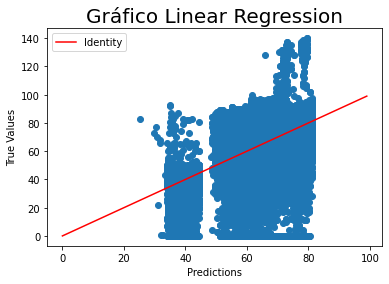

In [ ]:
#Vamos a plotear Predictions vs True values
plt.scatter(linear_prediction, target_name_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity') #Linea identidad (Predictions = True Values)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.title("Gráfico Linear Regression", size = 20)
plot_name = str(plot_path+'Gráfico_Linear_Regression')
plot_format = ".png"
plt.savefig(plot_name+plot_format)
plt.legend()
print(f'R2 score: {linear_r2:.6f}')
print(f'MSE: {linear_mse:.6f}')
print(f'MAE: {linear_mae:.6f}')

In [ ]:
results_clase_regular = results_clase_regular.append({'Model':'LR',
                                'Features':'Lineal',
                                'R2':linear_r2,
                                'MSE':linear_mse,
                                'MAE':linear_mae},ignore_index=True)

Support Vector Regression (SVR)

In [ ]:
# Ahora cambiamos el estimador, usaremos SVR
svr = SVR(max_iter=25000)
# Lista del parametro lambda (parametro 'alpAha')
#parameters = {'C' : [1,10,30,50,100],
#              'epsilon' : [0.001, 0.01,0.1,1,10],
#             'gamma':[0.001,0.01,0.1,1]}
parameters = {'C' : [1,100],
              'epsilon' : [10],
             'gamma':[0.1]}
# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs = GridSearchCV(svr, param_grid=parameters,refit=True,
                  cv=n_folds, scoring="neg_mean_squared_error",
                  verbose=3, n_jobs=3)

In [ ]:
# Entrenamos
gs.fit(features_name2_train, target_name_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


GridSearchCV(cv=5, estimator=SVR(max_iter=25000), n_jobs=3,
             param_grid={'C': [1, 100], 'epsilon': [10], 'gamma': [0.1]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

SVR(C=100, epsilon=10, gamma=0.1, max_iter=25000) 

{'C': 100, 'epsilon': 10, 'gamma': 0.1} 

-176.63057192763154 



In [ ]:
# Prediccion + Metricas
svr_prediction = gs.best_estimator_.predict(features_name2_test)
svr_r2 = r2_score(y_true=target_name_test, y_pred=svr_prediction)
svr_mse = mean_squared_error(y_true=target_name_test, y_pred=svr_prediction)
svr_mae = mean_absolute_error(y_true=target_name_test, y_pred=svr_prediction)

R2 score: 0.688056
MSE: 174.576973
MAE: 9.407282


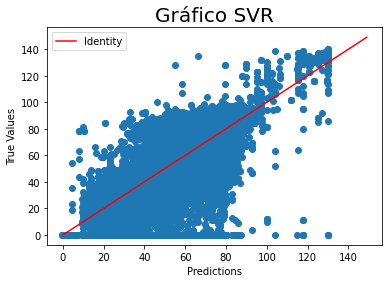

In [ ]:
plt.scatter(svr_prediction, target_name_test)
plt.plot(np.arange(0,150),np.arange(0,150), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.title("Gráfico SVR", size = 20)
plot_name = str(plot_path+'Gráfico_SVR')
plot_format = ".png"
plt.savefig(plot_name+plot_format)
plt.legend()
print(f'R2 score: {svr_r2:.6f}')
print(f'MSE: {svr_mse:.6f}')
print(f'MAE: {svr_mae:.6f}')

In [ ]:
results_clase_regular = results_clase_regular.append({'Model':'SVR',
                                'Features':'Linear',
                                'R2':svr_r2,
                                'MSE':svr_mse,
                                'MAE':svr_mae},ignore_index=True)

In [ ]:
results_clase_regular

,Model,Features,R2,MSE,MAE
0,LR,Lineal,0.349,364.472,14.668
1,SVR,Linear,0.688,174.577,9.407


Ridge Regression

In [ ]:
# Ahora cambiamos el estimador, usaremos Ridge Regression
ridge = Ridge()
# Lista del parametro lambda (llamado 'alpha' en el GridSearch)
lambdas = [5,6,7,8,9,10,11,12,13,14,15,17,19,21,23,25,30,40,50,60,70,100,200,300,400,500]
# Juntamos el diccionario de parametros
parameters = {'alpha': lambdas}
# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs = GridSearchCV(ridge, param_grid=parameters,refit=True, cv=n_folds, scoring="neg_mean_squared_error")

In [ ]:
# Entrenamos
gs.fit(features_name2_train, target_name_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17,
                                   19, 21, 23, 25, 30, 40, 50, 60, 70, 100, 200,
                                   300, 400, 500]},
             scoring='neg_mean_squared_error')

In [ ]:
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

Ridge(alpha=400) 

{'alpha': 400} 

-359.6914269692381 



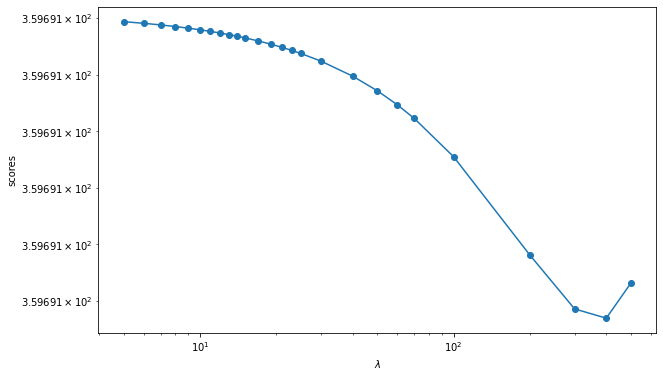

In [ ]:
# Vamos a plotear nuestro parametro lambda vs. el score
fit_lambdas = [d['alpha'] for d in gs.cv_results_['params']]
fit_scores = gs.cv_results_['mean_test_score']
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(fit_lambdas, -fit_scores, ls='-', marker='o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$\lambda$')
ax.set_ylabel('scores');
# En este caso, el lambda ideal seria 15

In [ ]:
#Predicciones + Metricas
ridge_prediction = gs.best_estimator_.predict(features_name2_test)
ridge_r2 = r2_score(y_true=target_name_test, y_pred=ridge_prediction)
ridge_mse = mean_squared_error(y_true=target_name_test, y_pred=ridge_prediction)
ridge_mae = mean_absolute_error(y_true=target_name_test, y_pred=ridge_prediction)

R2 score: 0.348744
MSE: 364.470495
MAE: 14.668153


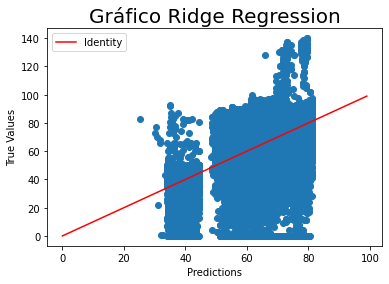

In [ ]:
plt.scatter(ridge_prediction, target_name_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.title("Gráfico Ridge Regression", size = 20)
plot_name = str(plot_path+'Gráfico_Ridge_Regression')
plot_format = ".png"
plt.savefig(plot_name+plot_format)
plt.legend()
print(f'R2 score: {ridge_r2:.6f}')
print(f'MSE: {ridge_mse:.6f}')
print(f'MAE: {ridge_mae:.6f}')

In [ ]:
#Guardamos resultados
results_clase_regular = results_clase_regular.append({'Model':'Ridge',
                                'Features':'Lineal',
                                'R2':ridge_r2,
                                'MSE':ridge_mse,
                                'MAE':ridge_mae},ignore_index=True)

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
display(results_clase_regular)

,Model,Features,R2,MSE,MAE
0,LR,Lineal,0.349,364.472,14.668
1,SVR,Linear,0.688,174.577,9.407
2,Ridge,Lineal,0.349,364.470,14.668


In [ ]:
svr.fit(features_name2_train, target_name_train)
ysvrpred = svr.predict(features_name2_test)

In [ ]:
#se van a predecir la cantidad de pasajeros que iran desde Mendoza a Ezeiza en la aeronave BO-B737-800 en el mes de enero
svr.predict(np.array([[1,26,13,15]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  "X does not have valid feature names, but"


array([70.73206485])

In [ ]:
#se van a predecir la cantidad de pasajeros que iran desde Bariloche a Aeroparque en la aeronave BO-B737-8LP en el mes de septiembre
svr.predict(np.array([[9,30,1,0]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  "X does not have valid feature names, but"


array([72.82584663])

In [ ]:
pasajeros_por_aeronave_y_mes = clase_regular.groupby(['mes','origen','destino','aeronave']).agg({'pasajeros':['mean'],'fecha':['count']})
pasajeros_por_aeronave_y_mes.tail(415)

pasajeros fecha
                                         mean count
mes origen destino aeronave                        
9   BAR    AER     BO-B737-86J         86.000     2
                   BO-B737-8BK         87.000     4
                   BO-B737-8LP         87.190    21
                   BO-B737-8MB         89.000     2
                   BO-B737-8SH         86.381    42
...                                       ...   ...
    USU    EZE     BO-B737-8LP         86.000     4
                   BO-B737-8SH         84.500     8
                   EMB-ERJ190100IGW    45.400     5
    VIE    AER     EMB-ERJ190100IGW    35.750     8
           BCA     EMB-ERJ190100IGW    18.812    16

[415 rows x 2 columns]